# Functional API Practice Example

### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.models import Model

### Sequential API Example

In [2]:
def build_model_with_sequential():
    seq_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                     tf.keras.layers.Dense(128, activation = 'relu'),
                                     tf.keras.layers.Dense(10, activation = 'softmax')])
    return seq_model

### Functional API Example

In [3]:
def build_model_with_functional():
    input_layer = tf.keras.Input(shape = (28, 28))

    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation = 'relu')(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation = 'softmax')(first_dense)

    func_model = Model(inputs = input_layer, outputs = output_layer)

    return func_model

### Build the model and visualize the model graph

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-10-26 20:20:34.870201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-26 20:20:34.870325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


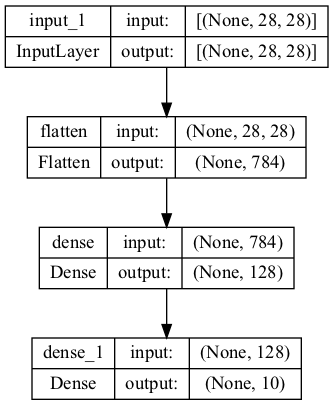

In [4]:
model = build_model_with_functional()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

### Training the model

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5)
model.evaluate(test_images, test_labels)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5


2022-10-26 20:25:24.064116: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-26 20:25:24.321649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 4ms/step - loss: 0.4975 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3732 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3332 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3120 - accuracy: 0.8856
Epoch 5/5
 25/313 [=>............................] - ETA: 1s - loss: 0.3656 - accuracy: 0.8737

2022-10-26 20:26:07.636622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3498 - accuracy: 0.8737


[0.3498181998729706, 0.8737000226974487]